# 模糊视觉模拟

根据Zernike像差, 模拟人眼看到的情景.

基本的路径如下:
* 通过Zernike系数, 计算出像差或者直接计算出PSF(Point Spread Function, 点扩散函数)
* 通过PSF, 与清晰图片进行卷积, 获得模糊图像



## 搜索需要的库

有三个常用的搜索引擎, Google, [PyPI](https://pypi.org/) 和 GitHub(https://github.com/), google就不必多说了.

* PyPI, The Python Package Index, 所有通过pip安装的库, 都会在PyPI上建立索引, 
    * 给个关键词, 比如zernike, 就可以在PyPI上搜索到与之相关联的库, 但缺点是难以评判优劣.
* GitHub, 是开源程序的大本营, 几乎所有的开源代码都会放在上面.
    * sspai上有一篇讲解[如何在github上搜索的教程](https://sspai.com/post/46061)
    * 在github上, 人们用star来表示对项目的喜好, 所以按照star排序, 很可以可以找到不错的项目.
    


In [1]:
import opticspy
import numpy as np
from PIL import Image
from scipy import signal
import matplotlib.pyplot as plt
from skimage import io


In [2]:
def blur_by_zernike(Z, im):
    psfmatrix=Z.psf(matrix=True)
    abspsf=abs(psfmatrix/psfmatrix.max())
    pic = np.array(im)
    abspic=(pic/pic.max())
    outpic=signal.fftconvolve(abspsf,abspic,mode="full")
    return abs(outpic/outpic.max())


1 6.32e-07 0.1


<Figure size 432x288 with 0 Axes>

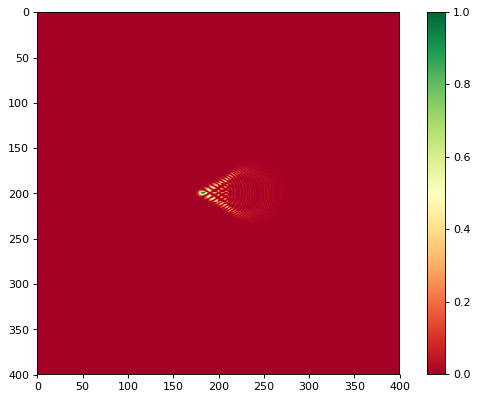

In [13]:
Z = opticspy.zernike.Coefficient(Z8=-1)
im = io.imread('img/img/b.jpeg', as_grey=True)
io.imsave("img/img/blurd_b.jpeg", blur_by_zernike(Z, im))


Z7 =  0.7071067811865476 Z31 Primary y Coma
Z8 =  0.7071067811865476 Z31 Primary x Coma


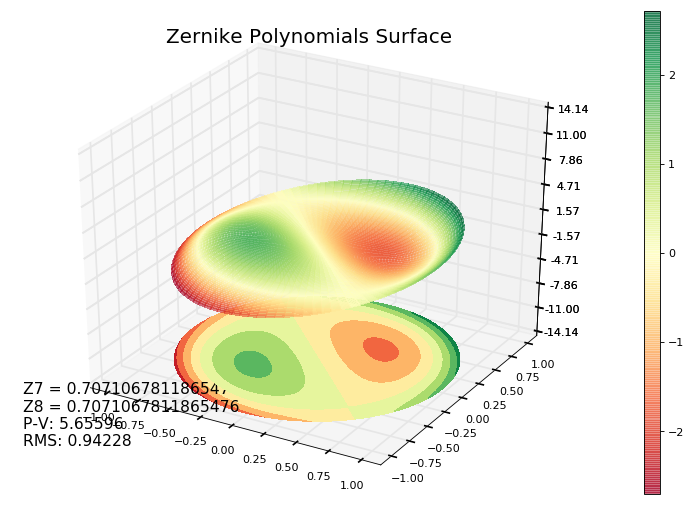

1 6.32e-07 0


<Figure size 432x288 with 0 Axes>

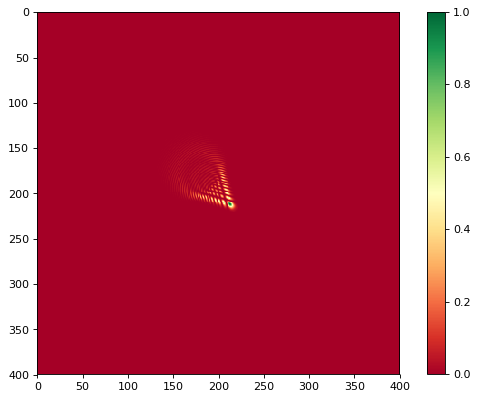

In [14]:
Z = opticspy.zernike.Coefficient(Z7=np.sqrt(2)/2,Z8=np.sqrt(2)/2)
Z.zernikesurface()
psfmatrix = Z.psf(z=0,matrix=True)
abspsf=abs(psfmatrix/psfmatrix.max())

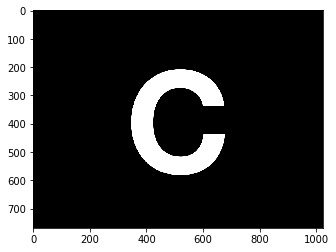

In [16]:
im = io.imread('img/img/c.jpeg', as_grey=True)
pic = np.array(im)
plt.imshow(im, cmap = plt.get_cmap('gray'))

# plt.imshow(im)
# imgplot=plt.imshow(pic)
# imgplot.set_cmap("gray")
# plt.colorbar()
plt.show()

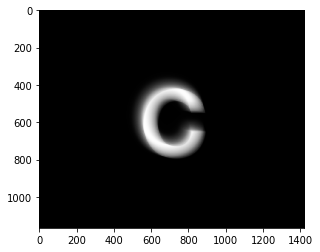

In [17]:
abspic=(pic/pic.max())
outpic=signal.fftconvolve(abspsf,abspic,mode="full")
outpic=np.trunc(255*abs(outpic/outpic.max()))
imgplot=plt.imshow(outpic)
imgplot.set_cmap("gray")
# plt.colorbar()
plt.show()

In [18]:
outpic=signal.fftconvolve(abspsf,abspic,mode="full")
io.imsave("img/blur_Letter_C.jpeg",abs(outpic/outpic.max()))

In [19]:
N=30
theta=np.linspace(0,2*np.pi,N)
for idx in range(N) :
    t=theta[idx]
    z7=np.cos(t)
    z8=np.sin(t)
    Z = opticspy.zernike.Coefficient(Z7=z7,Z8=z8)
    psfmatrix = Z.psf(draw=False,matrix=True)
    abspsf=abs(psfmatrix/psfmatrix.max())
    abspic=(pic/pic.max())
    outpic=signal.fftconvolve(abspsf,abspic,mode="full")
    io.imsave("img/blur_Letter_C_{}.jpeg".format(idx),abs(outpic/outpic.max()))


1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1
1 6.32e-07 0.1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>